In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

In [2]:

srate = 1000
dt = 1/srate
t = np.arange(0, 1, dt)

# sine and cosine wav  
lpf = np.sin(2*np.pi*10*t) + 0.5*np.cos(2*np.pi*20*t)
lpf2 = np.sin(2*np.pi*10*t) + 0.5*np.cos(2*np.pi*20*t + np.pi/4)

# random noise 

noise1 = np.random.normal(0, 1, len(t))
noise2 = np.random.normal(0, 1, len(t)) 

X = lpf + noise1
Y = lpf2 + noise2

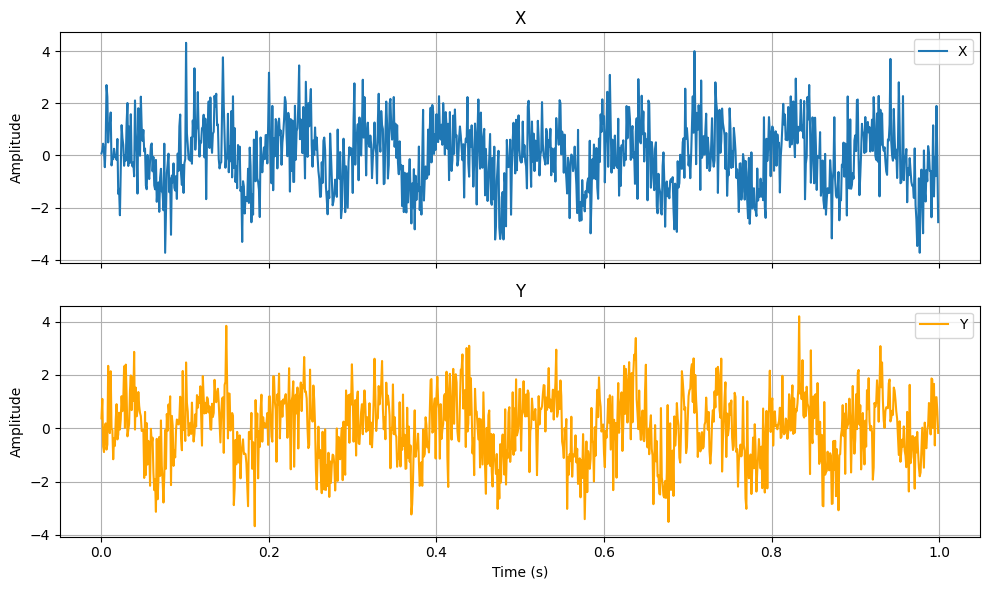

In [3]:

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axs[0].plot(t, X, label='X')
axs[0].set_title('X')
axs[0].set_ylabel('Amplitude')
axs[0].grid()
axs[0].legend()

axs[1].plot(t, Y, label='Y', color='orange')
axs[1].set_title('Y')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
win = 10*srate #window size 
overlap = 0*win 

nfft = 10*srate 

#Estimate the cross power spectral density, Pxy, using Welch's method.
C , F = sp.signal.csd(X, Y, fs=srate, nperseg=win, noverlap=overlap, nfft=nfft)

# Estimate power spectral density using Welch's method.
# Pxx, F = sp.signal.welch(X, fs=srate, nperseg=win, noverlap=overlap, nfft=nfft)

# Estimate power spectral density using a periodogram.
# Pxx , F = sp.signal.periodogram(X, fs=srate, nfft=nfft) detrand , return_onesided and scaling

# Estimate the magnitude squared coherence estimate, Cxy, of discrete-time signals X and Y using Welch's method.
# Cxy , F = sp.signal.coherence(X, Y, fs=srate, nperseg=win, noverlap=overlap, nfft=nfft)

# Provide a parametrized discrete Short-time Fourier transform (stft) and its inverse (istft).
# f, t, Zxx = sp.signal.ShortTimeFFT(X, fs=srate, nperseg=win, noverlap=overlap, nfft=nfft)

/home/rafael/anaconda3/envs/figas2/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 10000 is greater than input length  = 1000, using nperseg = 1000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


/home/rafael/anaconda3/envs/figas2/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/rafael/anaconda3/envs/figas2/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


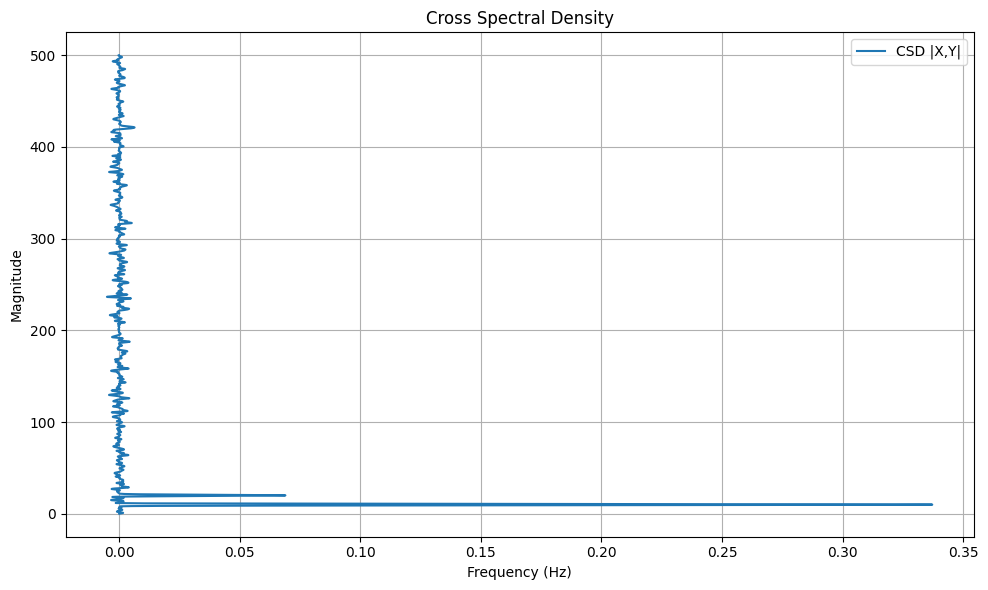

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(F, np.abs(C), label='CSD |X,Y|')
ax.set_title('Cross Spectral Density')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
#### Surrogados 
### Calcular pwelch
###  feito isso, aula 9 feita 